Лабораторная работа № 5

Кластеризация (k-средних,
иерархическая)

Выполнил: Королёв Фёдор Олегович, ПИ15

**1. Загрузка данных**

1.1 Загрузить датасет по ссылке: https://archive.ics.uci.edu/dataset/109/wine.

1.2 Создать Python скрипт. Загрузить данные в датафрейм

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Так как в файле нет заголовков, мы укажем их вручную
column_names = [
    'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
    'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
    'Proanthocyanins', 'Color_Intensity', 'Hue',
    'OD280_OD315', 'Proline', 'Class'
]

# Загружаем данные в датафрейм
df = pd.read_csv('wine.data', header=None, names=column_names)

# Выводим датафрейм для проверки
print("Данные о винах:")
print(df)

Данные о винах:
     Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  Total_Phenols  \
0          1       14.23  1.71               2.43       15.6            127   
1          1       13.20  1.78               2.14       11.2            100   
2          1       13.16  2.36               2.67       18.6            101   
3          1       14.37  1.95               2.50       16.8            113   
4          1       13.24  2.59               2.87       21.0            118   
..       ...         ...   ...                ...        ...            ...   
173        3       13.71  5.65               2.45       20.5             95   
174        3       13.40  3.91               2.48       23.0            102   
175        3       13.27  4.28               2.26       20.0            120   
176        3       13.17  2.59               2.37       20.0            120   
177        3       14.13  4.10               2.74       24.5             96   

     Flavanoids  Nonflavanoid_Pheno

1.3. При необходимости, произвести стандартизацию данных с
использованием preprocessing.StandardScaler() из sklearn

In [2]:
# Создаем объект StandardScaler для стандартизации данных
scaler = StandardScaler()

# Выделяем только числовые колонки для стандартизации (все кроме последней колонки "Class")
features = df.iloc[:, :-1]

# Применяем стандартизацию к данным
scaled_features = scaler.fit_transform(features)

# Преобразуем стандартизированные данные обратно в датафрейм
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Добавляем колонку "Class" обратно в стандартизированный датафрейм
scaled_df['Class'] = df['Class']

# Выводим стандартизированный датафрейм для проверки
print("\nСтандартизированные данные о винах:")
print(scaled_df)


Стандартизированные данные о винах:
      Alcohol  Malic_Acid       Ash  Alcalinity_of_Ash  Magnesium  \
0   -1.213944    1.518613 -0.562250           0.232053  -1.169593   
1   -1.213944    0.246290 -0.499413          -0.827996  -2.490847   
2   -1.213944    0.196879  0.021231           1.109334  -0.268738   
3   -1.213944    1.691550 -0.346811           0.487926  -0.809251   
4   -1.213944    0.295700  0.227694           1.840403   0.451946   
..        ...         ...       ...                ...        ...   
173  1.373864    0.876275  2.974543           0.305159   0.301803   
174  1.373864    0.493343  1.412609           0.414820   1.052516   
175  1.373864    0.332758  1.744744          -0.389355   0.151661   
176  1.373864    0.209232  0.227694           0.012732   0.151661   
177  1.373864    1.395086  1.583165           1.365208   1.502943   

     Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0         1.913905    0.808997              1.034819        -

1.4. Подготовить данные для дальнейшего анализа:

*   Понизить размерность пространства данных до размерности n , при
которой компоненты объясняют не менее 85% дисперсии данных.
Понижение размерности пространства осуществляется с помощью
метода главных компонент (PCA.fit_transform)
*   Восстановить данные для полученного количества компонент
(PCA.inverse_transform).



In [3]:
# Импортируем необходимые библиотеки для понижения размерности
from sklearn.decomposition import PCA

# Создаем объект PCA
pca = PCA()

# Применяем PCA к стандартизированным данным (без колонки "Class")
pca.fit(scaled_df.iloc[:, :-1])

# Получаем объясненную дисперсию для каждой компоненты
explained_variance = pca.explained_variance_ratio_

# Вычисляем накопленную дисперсию
cumulative_variance = explained_variance.cumsum()

# Находим количество компонент, которые объясняют не менее 85% дисперсии
n_components = (cumulative_variance >= 0.85).argmax() + 1

print(f"Количество компонент, объясняющих не менее 85% дисперсии: {n_components}")

# Теперь применяем PCA с найденным количеством компонент
pca = PCA(n_components=n_components)

# Применяем метод fit_transform для понижения размерности данных
reduced_data = pca.fit_transform(scaled_df.iloc[:, :-1])

# Восстанавливаем данные из пониженной размерности
reconstructed_data = pca.inverse_transform(reduced_data)

# Преобразуем восстановленные данные обратно в датафрейм для удобства
reconstructed_df = pd.DataFrame(reconstructed_data, columns=scaled_df.columns[:-1])

# Добавляем колонку "Class" обратно в восстановленные данные
reconstructed_df['Class'] = scaled_df['Class'].values

# Выводим информацию о восстановленных данных
print("\nВосстановленные данные после понижения размерности:")
print(reconstructed_df.head())


Количество компонент, объясняющих не менее 85% дисперсии: 6

Восстановленные данные после понижения размерности:
    Alcohol  Malic_Acid       Ash  Alcalinity_of_Ash  Magnesium  \
0 -1.398697    1.270049 -0.485950           0.401618  -1.007110   
1 -1.251754    0.861739 -0.449494          -1.133760  -1.930143   
2 -0.843455    0.399035 -0.142320           0.664722   0.180865   
3 -1.360277    1.778252 -0.077020           0.579095  -0.890504   
4 -0.796920    0.499780  0.109533           1.792390   0.704049   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0       1.546595    1.236948              1.294149        -1.313450   
1      -0.069506    0.441029              0.615974        -1.006898   
2       0.218786    1.417902              1.358526        -0.493833   
3       0.861031    1.738269              1.614930        -0.980509   
4       1.130673    0.718770              0.785990        -0.110835   

   Color_Intensity       Hue  OD280_OD315   Proline  Clas

**2. K-Mean**

2.1. Провести кластеризацию методом k-средних. Вывести на экран
значения центров кластеров и количество наблюдений, которое попало в
каждый кластер (Использовать: KMeans из sklearn.cluster)

In [4]:
# Импортируем необходимые библиотеки для кластеризации
from sklearn.cluster import KMeans
import numpy as np

# Определяем количество кластеров, например, 3, так как у нас 3 класса вина
n_clusters = 3

# Создаем объект KMeans с заданным количеством кластеров
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Применяем метод fit для обучения модели на пониженных данных
kmeans.fit(reduced_data)

# Получаем центры кластеров
cluster_centers = kmeans.cluster_centers_

# Получаем метки кластеров для каждого наблюдения
labels = kmeans.labels_

# Подсчитываем количество наблюдений в каждом кластере
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Выводим результаты
print("Центры кластеров:")
print(cluster_centers)

print("\nКоличество наблюдений в каждом кластере:")
for cluster, count in cluster_counts.items():
    print(f"Кластер {cluster}: {count} наблюдений")


Центры кластеров:
[[ 2.41142812e-01 -1.55097056e+00  1.93723907e-01 -2.08749225e-02
  -1.68694477e-01 -1.36026787e-01]
 [-3.11420857e+00  8.53841059e-01 -2.60828125e-01 -1.13648209e-02
  -7.24780414e-02 -7.29797721e-02]
 [ 2.28776820e+00  1.00365532e+00  1.01482809e-03  3.22436205e-02
   2.44695607e-01  2.09225956e-01]]

Количество наблюдений в каждом кластере:
Кластер 0: 67 наблюдений
Кластер 1: 50 наблюдений
Кластер 2: 61 наблюдений


2.2. Построить (графически) результаты классификации для признаков
попарно (1 и 2, 2 и 3, ..., n -1 и n ), отобразить центры кластеров

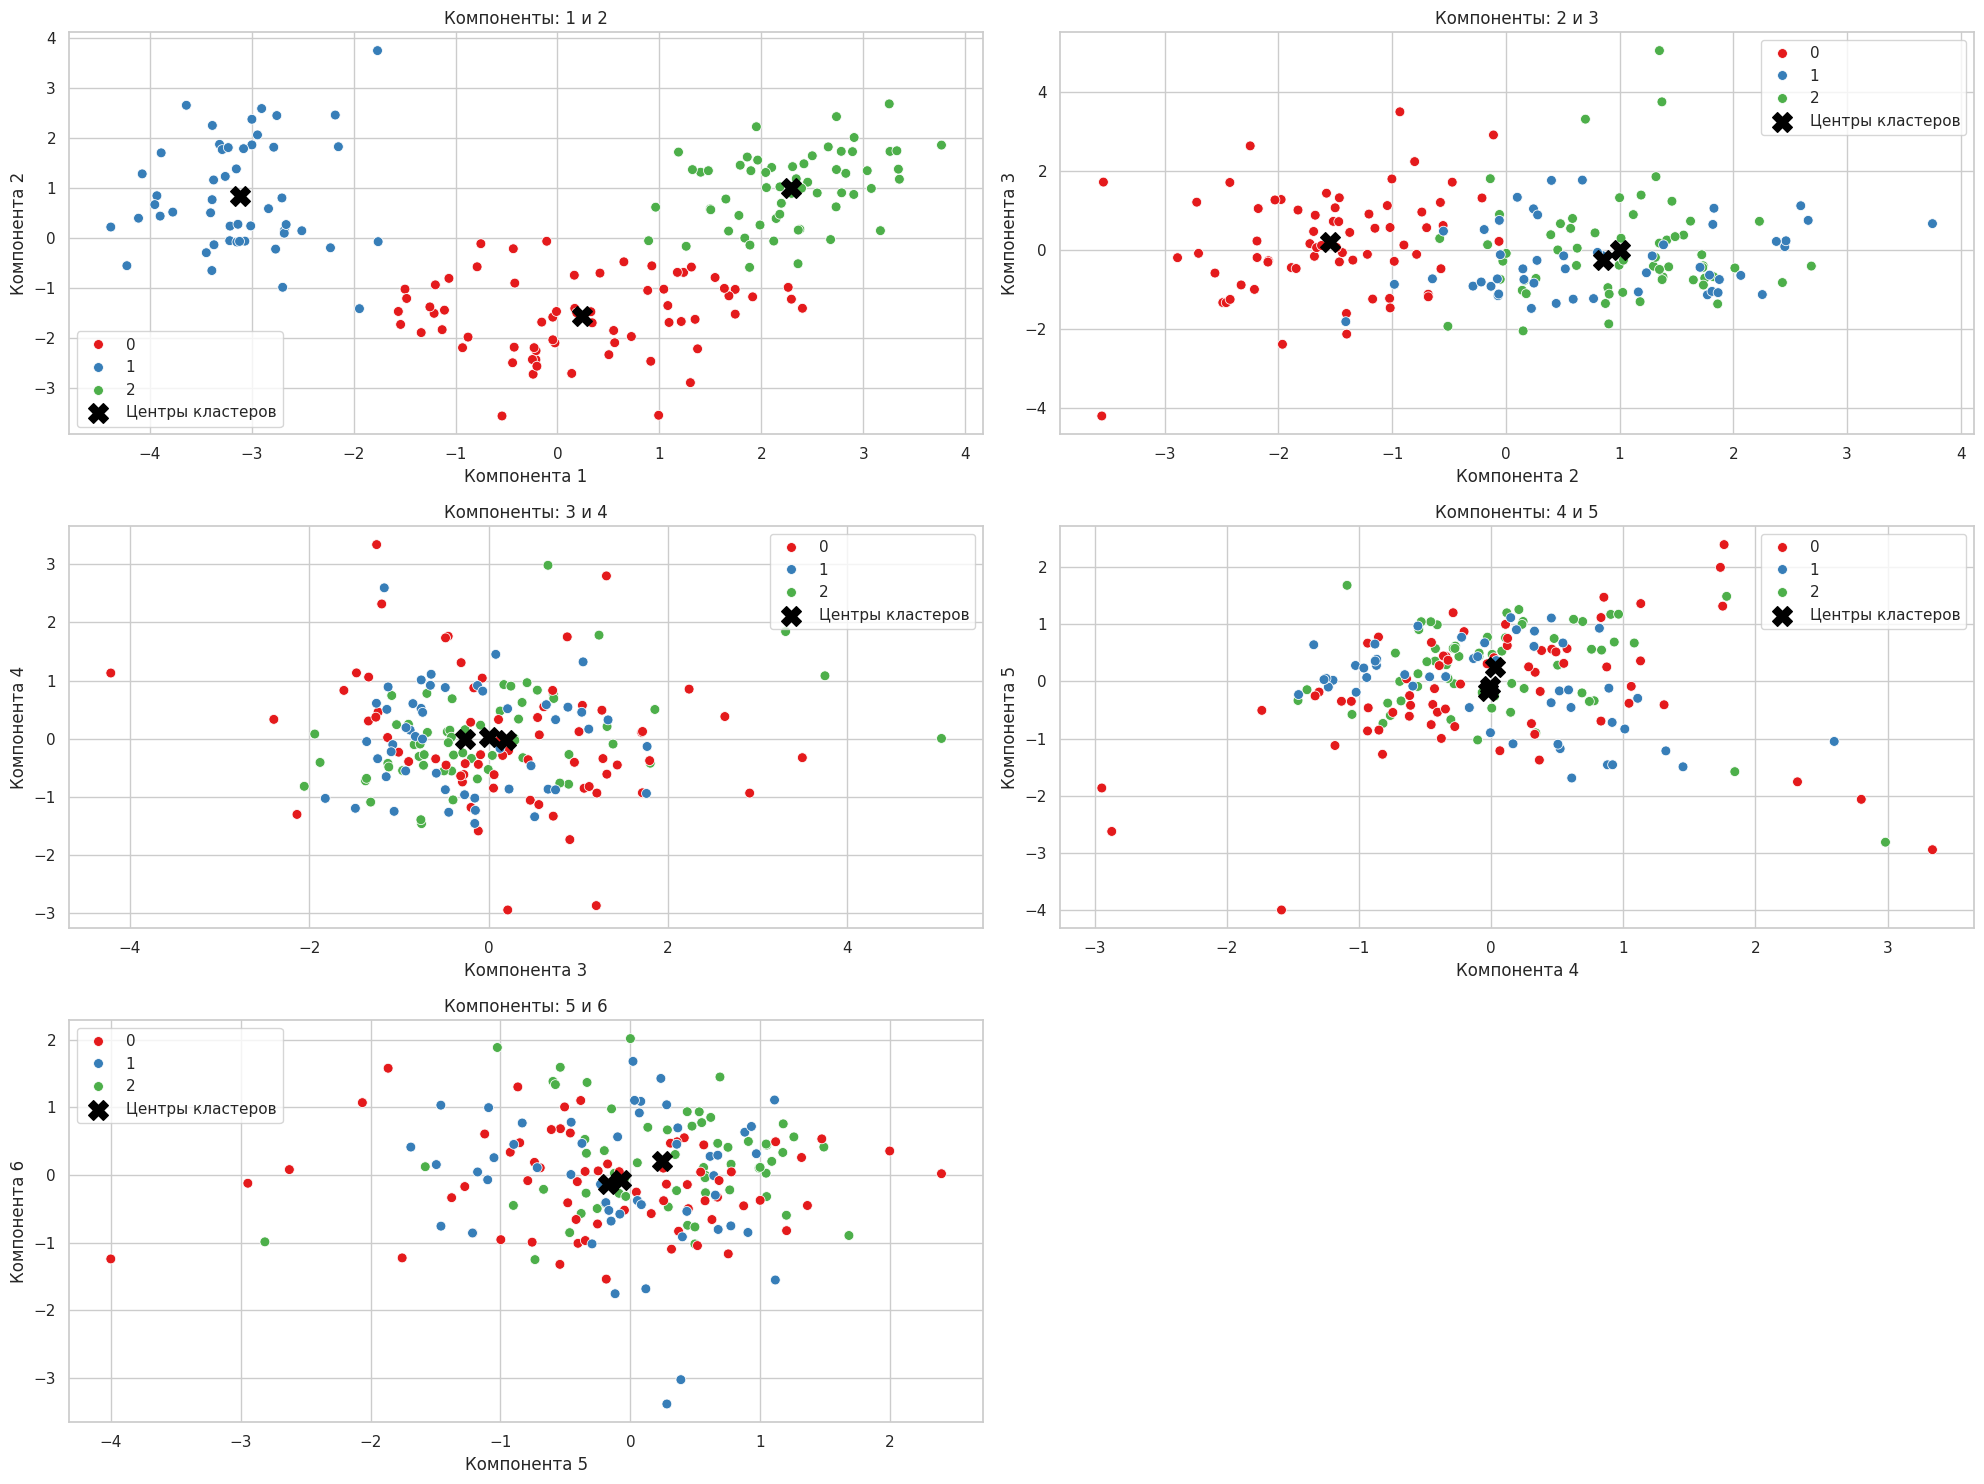

In [5]:
# Импортируем необходимые библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Определяем количество признаков для построения попарных графиков
n_features = reduced_data.shape[1]  # Количество компонент после PCA

# Определяем количество строк и столбцов для подграфиков
n_rows = 3
n_cols = (n_features - 1) // n_rows + 1  # Количество столбцов

# Создаем фигуру для подграфиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Превращаем массив осей в одномерный массив для удобства

# Индекс для отслеживания заполненных осей
index = 0

# Перебираем все пары соседних признаков для построения графиков
for i in range(n_features - 1):
    j = i + 1  # Сравниваем i-ю компоненту с (i+1)-й компонентой
    ax = axes[index]  # Выбираем текущий подграфик

    # Строим график рассеяния для текущей пары признаков, окрашивая по меткам кластеров
    sns.scatterplot(x=reduced_data[:, i], y=reduced_data[:, j], hue=labels, palette='Set1', ax=ax, s=50)

    # Отображаем центры кластеров на графике
    cluster_center_x = cluster_centers[:, i]
    cluster_center_y = cluster_centers[:, j]
    ax.scatter(cluster_center_x, cluster_center_y, color='black', marker='X', s=200, label='Центры кластеров')

    # Настраиваем заголовок и метки осей
    ax.set_title(f'Компоненты: {i + 1} и {j + 1}')
    ax.set_xlabel(f'Компонента {i + 1}')
    ax.set_ylabel(f'Компонента {j + 1}')
    ax.legend()

    index += 1

# Убираем пустые подграфики (если есть)
for i in range(index, len(axes)):
    fig.delaxes(axes[i])

# Показываем графики
plt.tight_layout()
plt.show()



Дать пояснения:
1. На что влияет параметр n_init ?
2. Чему равно оптимальное значение для n_init ? Почему это
оптимальное значение?
3. Что происходит при увеличении и уменьшении параметра n_init от
оптимального?
4. По каким признакам произошло наилучшее разделение?
5. Как изменятся результаты, если в качестве метода инициализации
выбрать random ?

В этом пункте я использовал метод "локтя", который подглядел в пункте 2.5. Я не знал, как лучше продемонстрировать результат, пока не дошёл до пункта 2.5 и не открыл для себя инерцию (inertia)

n_init=1, Inertia=910.72
n_init=2, Inertia=910.72
n_init=3, Inertia=910.72
n_init=4, Inertia=910.72
n_init=5, Inertia=910.72
n_init=6, Inertia=910.72
n_init=7, Inertia=910.72
n_init=8, Inertia=910.72
n_init=9, Inertia=910.72
n_init=10, Inertia=910.72
n_init=11, Inertia=910.44
n_init=12, Inertia=910.44
n_init=13, Inertia=910.44
n_init=14, Inertia=910.44
n_init=15, Inertia=910.44
n_init=16, Inertia=910.44
n_init=17, Inertia=910.44
n_init=18, Inertia=910.44
n_init=19, Inertia=910.44
n_init=20, Inertia=910.44


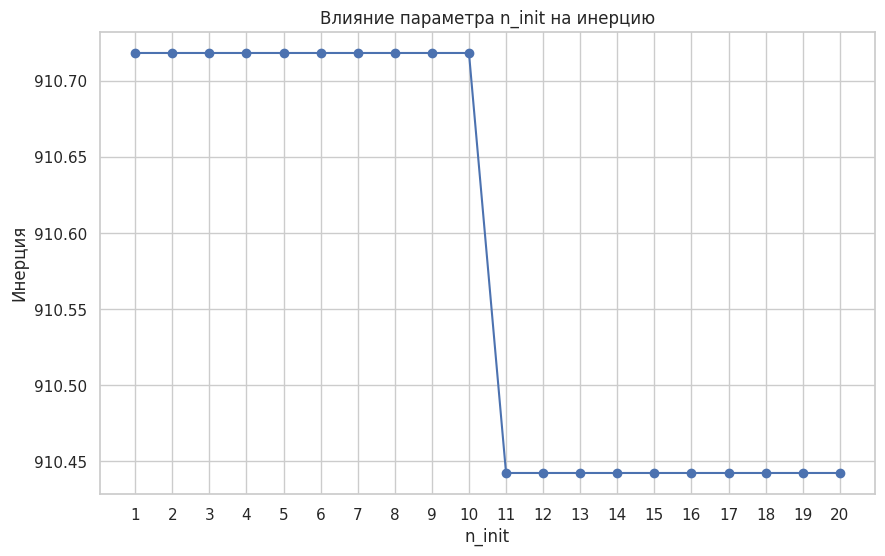

In [6]:
# 1. На что влияет параметр n_init ?

# Определяем диапазон значений для n_init
n_init_values = range(1, 21)  # От 1 до 20

# Список для хранения инерции для каждого значения n_init
inertia_values = []

# Проходим по каждому значению n_init и вычисляем инерцию
for n_init in n_init_values:
    kmeans = KMeans(n_clusters=3, n_init=n_init, random_state=42)
    kmeans.fit(reduced_data)
    inertia_values.append(kmeans.inertia_)
    print(f"n_init={n_init}, Inertia={kmeans.inertia_:.2f}")

# Визуализируем зависимость инерции от n_init
plt.figure(figsize=(10, 6))
plt.plot(n_init_values, inertia_values, marker='o')
plt.title('Влияние параметра n_init на инерцию')
plt.xlabel('n_init')
plt.ylabel('Инерция')
plt.xticks(n_init_values)
plt.grid(True)
plt.show()

Параметр n_init в методе k-средних влияет на стабильность и качество конечного результата кластеризации. По сути, этот параметр задает количество повторений алгоритм k-средних будет инициализироваться с различными начальными точками перед выбором наилучшего результата (с минимальным значением инерции). Инерция (inertia) отражает суммарное квадратичное расстояние точек от центров их кластеров. Меньшее значение инерции указывает на лучшую "компактность" кластеров.

 В нашем случае видно, что при n_init=1 до n_init=10 инерция равна 910.72, но начиная с n_init=11, алгоритм смог найти более оптимальное разбиение с инерцией 910.44, и с этим значением остановился. Получается, что увеличение n_init помогло улучшить результат кластеризации за счет повторной инициализации

In [7]:
# 2. Чему равно оптимальное значение для n_init ? Почему это оптимальное значение?

# Найдем минимальное значение инерции
min_inertia = min(inertia_values)
optimal_n_init = n_init_values[inertia_values.index(min_inertia)]

print(f"\nОптимальное значение n_init: {optimal_n_init}")
print(f"Минимальная инерция: {min_inertia:.2f}")


Оптимальное значение n_init: 11
Минимальная инерция: 910.44


Оптимальное значение n_init = 11, т.к. при этом значении  модель смогла найти разбиение с наименьшей суммарной инерцией (максимальной компактностью кластеров), равной 910.44. Раз после 11 инерция не изменилась, что говорит о том, что дополнительные итерации не привели к более эффективному разбиению

In [ ]:
# 3. Что происходит при увеличении и уменьшении параметра n_init от оптимального?

При n_init=9, инерция равна 910.72, что указывает на менее оптимальное разбиение. Причина заключается в том, что при меньшем количестве инициализаций вероятность получить менее удачное начальное положение центроидов возрастает, что и приводит к менее компактным кластерам

При n_init=13 инерция остается на уровне 910.44, что совпадает с минимальным значением, достигнутым при n_init=11. Дальнейшее увеличение n_init не улучшает результат, так как алгоритм уже нашел оптимальное разбиение

In [ ]:
# 4. По каким признакам произошло наилучшее разделение?


По построенным графика м в пункте 2.2 видно, что наилучшее разделение произошло между 1 и 2 компонентами

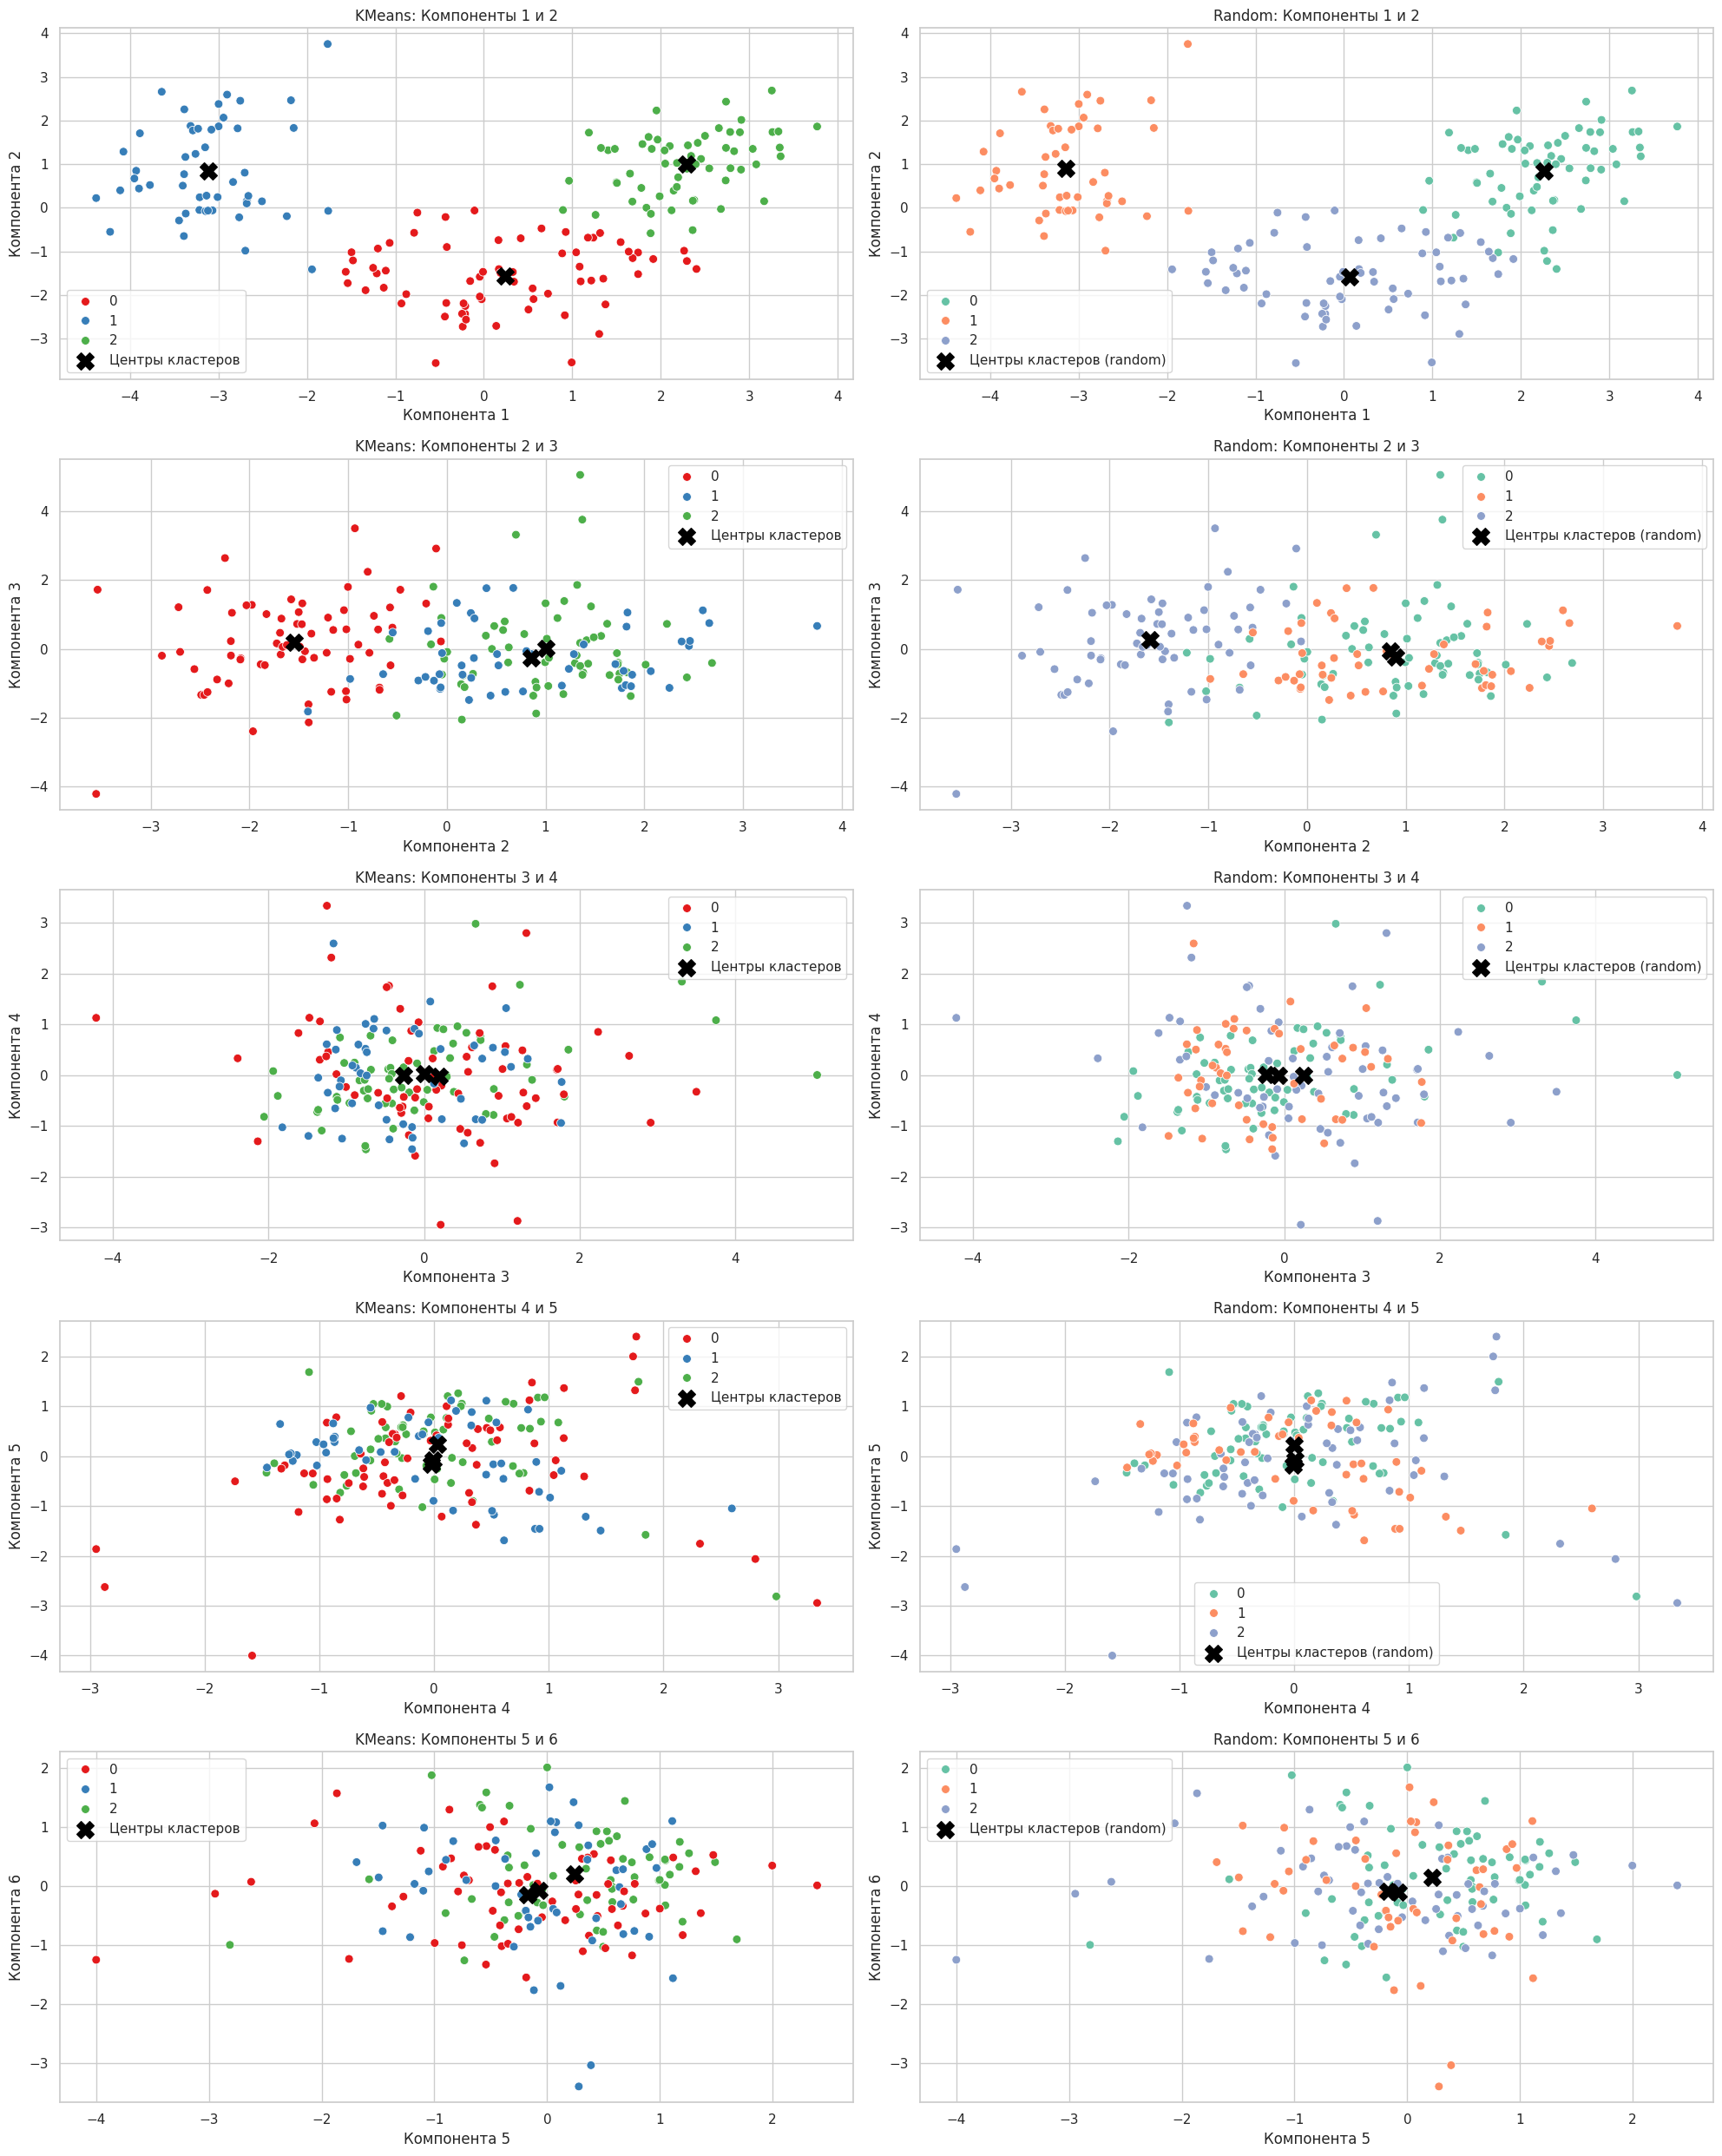

In [8]:
# 5. Как изменятся результаты, если в качестве метода инициализации выбрать random ?

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Определяем количество признаков для построения попарных графиков
n_features = reduced_data.shape[1]  # Количество компонент после PCA

# Определяем количество строк и столбцов для подграфиков
n_rows = 5  # Увеличиваем количество строк до 5 для отображения всех графиков
n_cols = 2  # Два столбца (один для KMeans, второй для random)

# Создаем фигуру для подграфиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
axes = axes.flatten()  # Превращаем массив осей в одномерный массив для удобства

# Индекс для отслеживания заполненных осей
index = 0

# Перебираем все пары соседних признаков для построения графиков
for i in range(n_features - 1):
    j = i + 1  # Сравниваем i-ю компоненту с (i+1)-й компонентой

    # Проверка на выход за пределы массива осей
    if index < len(axes):
        ax = axes[index]  # Выбираем текущий подграфик для KMeans

        # Строим график рассеяния для текущей пары признаков, окрашивая по меткам кластеров
        sns.scatterplot(x=reduced_data[:, i], y=reduced_data[:, j], hue=labels, palette='Set1', ax=ax, s=50)

        # Отображаем центры кластеров на графике
        cluster_center_x = cluster_centers[:, i]
        cluster_center_y = cluster_centers[:, j]
        ax.scatter(cluster_center_x, cluster_center_y, color='black', marker='X', s=200, label='Центры кластеров')

        # Настраиваем заголовок и метки осей
        ax.set_title(f'KMeans: Компоненты {i + 1} и {j + 1}')
        ax.set_xlabel(f'Компонента {i + 1}')
        ax.set_ylabel(f'Компонента {j + 1}')
        ax.legend()

        index += 1

    # Проверка на выход за пределы массива осей перед добавлением графика random
    if index < len(axes):
        ax = axes[index]  # Выбираем следующий подграфик для random

        # Строим график для random (метод инициализации)
        kmeans_random = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=42)
        random_labels = kmeans_random.fit_predict(reduced_data)  # Применяем кластеризацию с random инициализацией

        # Строим график рассеяния для текущей пары признаков, окрашивая по меткам кластеров
        sns.scatterplot(x=reduced_data[:, i], y=reduced_data[:, j], hue=random_labels, palette='Set2', ax=ax, s=50)

        # Отображаем центры кластеров на графике для random
        random_center_x = kmeans_random.cluster_centers_[:, i]
        random_center_y = kmeans_random.cluster_centers_[:, j]
        ax.scatter(random_center_x, random_center_y, color='black', marker='X', s=200, label='Центры кластеров (random)')

        # Настраиваем заголовок и метки осей для random
        ax.set_title(f'Random: Компоненты {i + 1} и {j + 1}')
        ax.set_xlabel(f'Компонента {i + 1}')
        ax.set_ylabel(f'Компонента {j + 1}')
        ax.legend()

        index += 1

# Убираем пустые подграфики (если есть)
for i in range(index, len(axes)):
    fig.delaxes(axes[i])

# Показываем графики
plt.tight_layout()
plt.show()


Сравнивания полученные результаты, можно смело заявить, что изменения незначительны

2.3 Уменьшить размерность данных до n=2 используя метод главных
компонент и нарисовать карту для всей области значений, на которой каждый кластер занимает определенную область со своим цветом

В кластере № 0 49 элементов
В кластере № 1 61 элементов
В кластере № 2 68 элементов
Центры
[[-3.13813411  0.89999451]
 [ 2.31020734  0.98837171]
 [ 0.18891065 -1.53515302]]



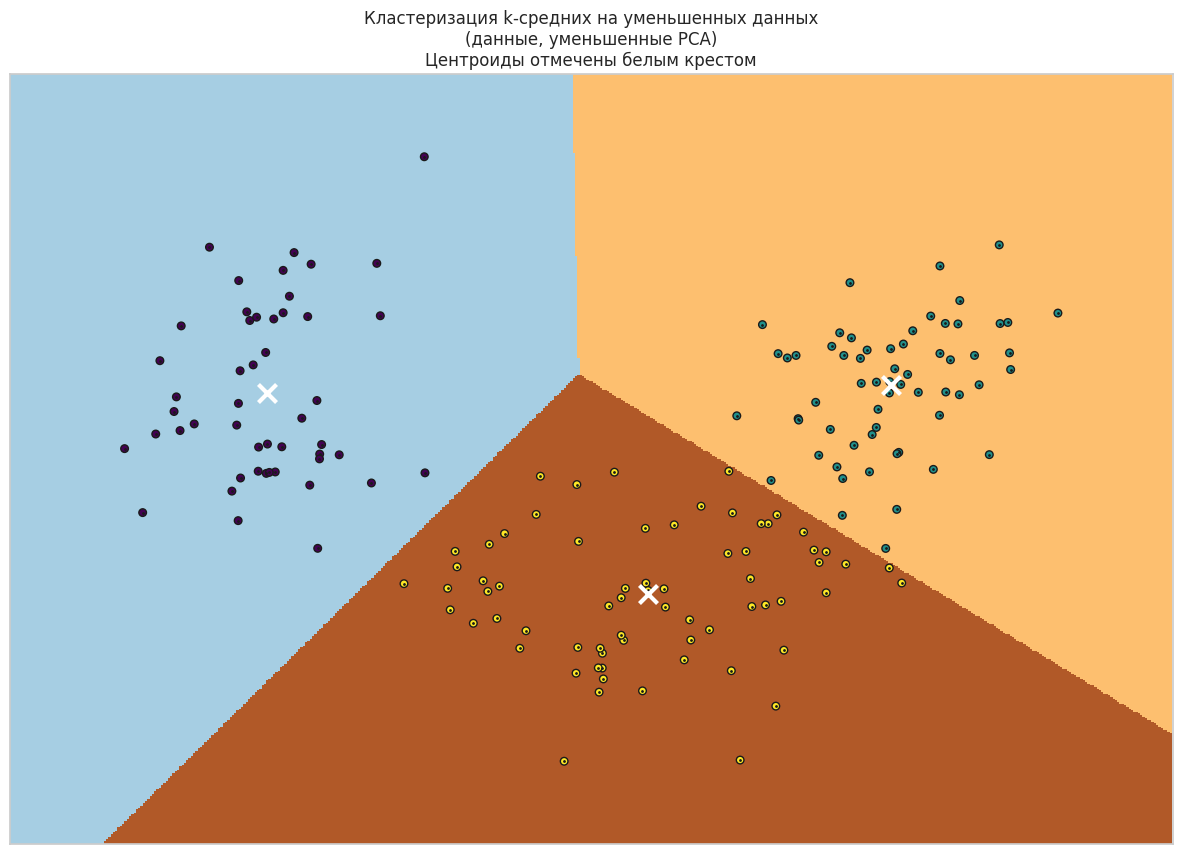

In [9]:
# Уменьшаем размерность данных до 2 с помощью PCA
new_data = PCA(n_components=2).fit_transform(reduced_data)  # Используем данные после PCA

# Определяем количество кластеров
n_clusters = 3

# Создаем объект KMeans с заданными параметрами
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=4)

# Обучаем модель KMeans на уменьшенных данных
kmeans.fit(new_data)

# Размер шага сетки для построения границ кластеров
h = 0.02  # точка в сетке [x_min, x_max]x[y_min, y_max].

# Определяем границы для построения карты
x_min, x_max = new_data[:, 0].min() - 1, new_data[:, 0].max() + 1
y_min, y_max = new_data[:, 1].min() - 1, new_data[:, 1].max() + 1

# Создаем сетку для визуализации
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Получаем предсказания кластеров для новых данных
sk_kmeans_pred_res = kmeans.predict(new_data)

# Подсчитываем количество элементов в каждом кластере и выводим результат
for i in range(n_clusters):
    count_of_clusters = np.sum(sk_kmeans_pred_res == i)  # Считаем количество элементов в кластере i
    print('В кластере №', i, count_of_clusters, 'элементов')

# Получаем метки для каждой точки в сетке. Используем последнюю обученную модель.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Помещаем результат в цветовую диаграмму.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

# Визуализируем точки данных с цветами кластеров
plt.scatter(new_data[:, 0], new_data[:, 1], c=kmeans.labels_, cmap='viridis', s=30, edgecolor='k')

# Добавляем точки данных на график
plt.plot(new_data[:, 0], new_data[:, 1], "k.", markersize=2)

# Отображаем центры кластеров как белые кресты
centroids = kmeans.cluster_centers_
print("Центры", centroids, '', sep='\n')
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

# Настраиваем заголовок и оси графика
plt.title(
    "Кластеризация k-средних на уменьшенных данных\n(данные, уменьшенные PCA)\n"
    "Центроиды отмечены белым крестом"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Показываем график
plt.show()

2.4 Исследуйте работу алгоритма k-средних при различных параметрах init.

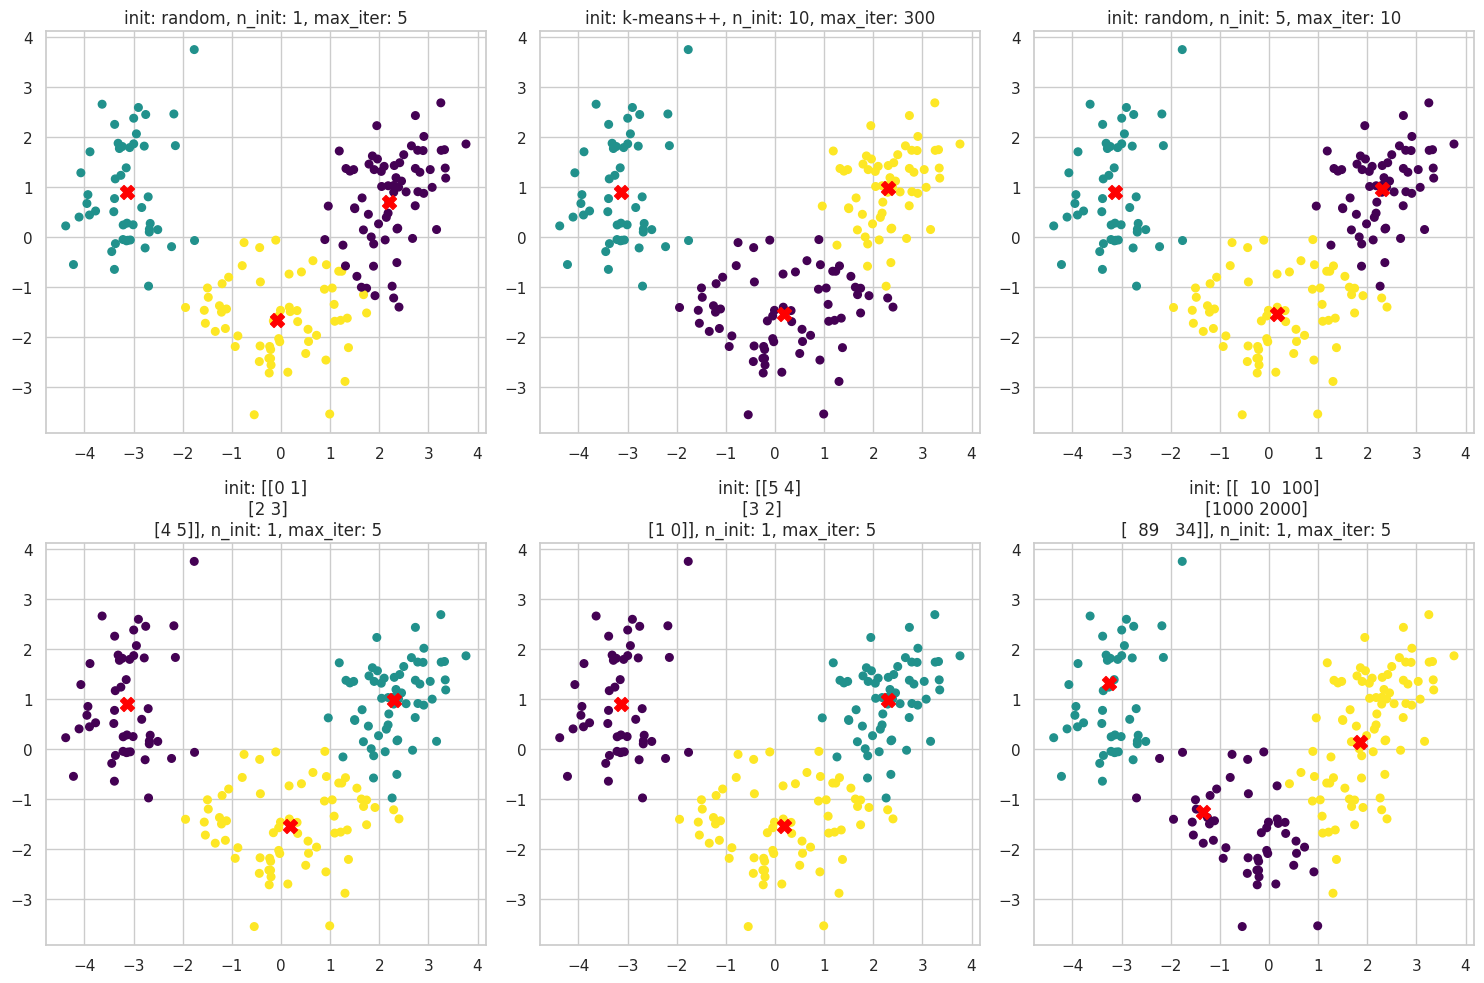

In [10]:
# Задание параметров для исследования init
init_options = [
    ('random', 1, 5),  # Случайная инициализация, 1 запуск, максимум 5 итераций
    ('k-means++', 10, 300),  # Инициализация по методу k-means++, 10 запусков, максимум 300 итераций
    ('random', 5, 10),  # Случайная инициализация, 5 запусков, максимум 10 итераций
    (np.array([[0, 1], [2, 3], [4, 5]]), 1, 5),  # Заданные центры кластеров, 1 запуск, максимум 5 итераций
    (np.array([[5, 4], [3, 2], [1, 0]]), 1, 5),  # Другие заданные центры кластеров
    (np.array([[10, 100], [1000, 2000], [89, 34]]), 1, 5)  # Еще одни заданные центры кластеров
]

# Создаем фигуру и подграфики для отображения результатов
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Превращаем массив осей в одномерный массив для удобства

# Перебираем все параметры инициализации из списка init_options
for i, (init, n_init, max_iter) in enumerate(init_options):
    # Настройка и обучение модели K-средних с различными параметрами init
    kmeans = KMeans(n_clusters=3, init=init, n_init=n_init, max_iter=max_iter, random_state=42)

    # Обучаем модель на уменьшенных данных
    kmeans.fit(new_data)

    # Отображение результатов кластеризации на текущем подграфике
    axes[i].scatter(new_data[:, 0], new_data[:, 1], c=kmeans.labels_, cmap='viridis', s=30)
    # Отображаем точки данных с цветами в зависимости от меток кластеров

    # Отображаем центры кластеров как красные кресты
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X')

    # Устанавливаем заголовок для текущего подграфика с параметрами инициализации
    title = f"init: {init}, n_init: {n_init}, max_iter: {max_iter}"
    axes[i].set_title(title)

# Настраиваем отступы между подграфиками для лучшего отображения
plt.tight_layout()
# Показываем графики с результатами кластеризации
plt.show()

Дать пояснения:
1. Как повлиял выбор параметра random на результат кластеризации?
2. Какой из вариантов оказался самым удачным и почему?
3. Влияет ли параметр max_iter на результат кластеризации?

1. Судя по полученным графикам, для init='random', n_init=1, max_iter=5 и других настроек с random начальные кластеры могут оказаться далеко от оптимального расположения. Однако, если увеличить количество запусков (n_init=5), результат становится более стабильным и кластеризация улучшается

2. Наиболее удачным вариантом оказался тот, где инициализация выполнялась с параметром k-means++ (init='k-means++', n_init=10, max_iter=300). Метод k-means++ оптимизирует начальное расположение центров кластеров, что приводит к лучшему качеству кластеризации. Такой вывод можно также сделать по полученным графикам (начальные точки центров находятся на максимально удаленных друг от друга позициях). В результате кластеры разделены более четко и равномерно

3. Для random и max_iter=5 кластеры могут быть не полностью сходящимися. Однако при значении max_iter=300 для k-means++ результат стабилизируется. В общем случае, увеличение max_iter полезно, если данные сложные и требуют большего числа итераций, но при достаточно простых данных, как в нашем случае, влияние минимально после определенного порога

2.5 Определите наилучшее количество кластеров методом локтя

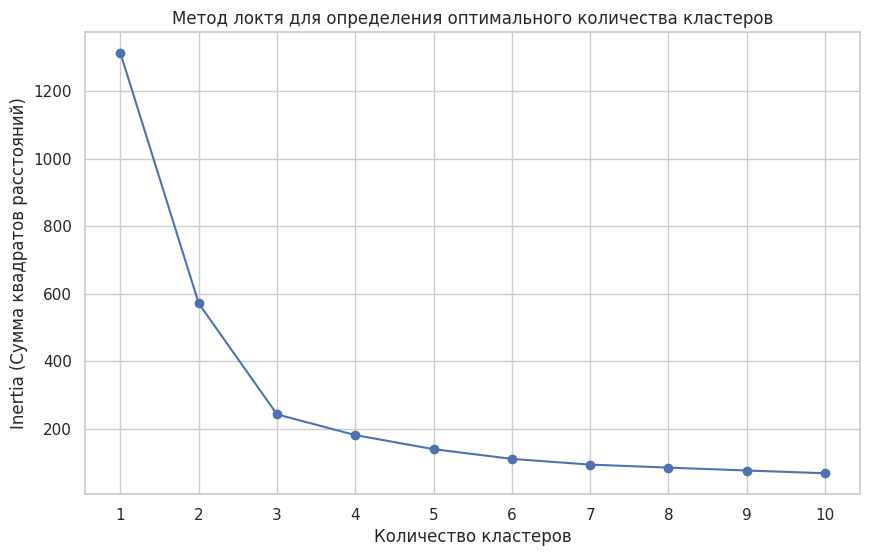

In [11]:
# Список для хранения значений inertia для каждого количества кластеров
inertia_values = []

# Перебираем количество кластеров в от 1 до 10
for n_clusters in range(1, 11):
    # Создаем объект KMeans с текущим количеством кластеров
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)

    # Обучаем модель на уменьшенных данных
    kmeans.fit(new_data)

    # Сохраняем значение inertia (сумма квадратов расстояний до центров кластеров)
    inertia_values.append(kmeans.inertia_)

# Построение графика для метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia (Сумма квадратов расстояний)')
plt.xticks(range(1, 11))  # Устанавливаем метки по оси X
plt.grid(True)  # Включаем сетку для лучшей визуализации

# Показываем график
plt.show()

Дать пояснения:
1. Что означает результат WCSS?
2. Почему найденное количество кластеров является наилучшим?

1. Я уже использовал WCSS (инерцию) в пункте 2.4. Инерция (inertia) отражает суммарное квадратичное расстояние точек от центров их кластеров. Меньшее значение инерции указывает на лучшую "компактность" кластеров

2. Как я описывал ранее, меньшее значение инерции указывает на лучшую "компактность" кластеров. Однако после определенного количества кластеров значение инерции практически не меняется. Это значит, что добавление дополнительных кластеров не приводит к значительному улучшению качества кластеризации

2.6 Проведите кластеризацию используя пакетную кластеризацию k-
средних. Постройте диаграмму рассеяния, на которой будут выделено точки,
которые для разных методов попали в разные кластеры

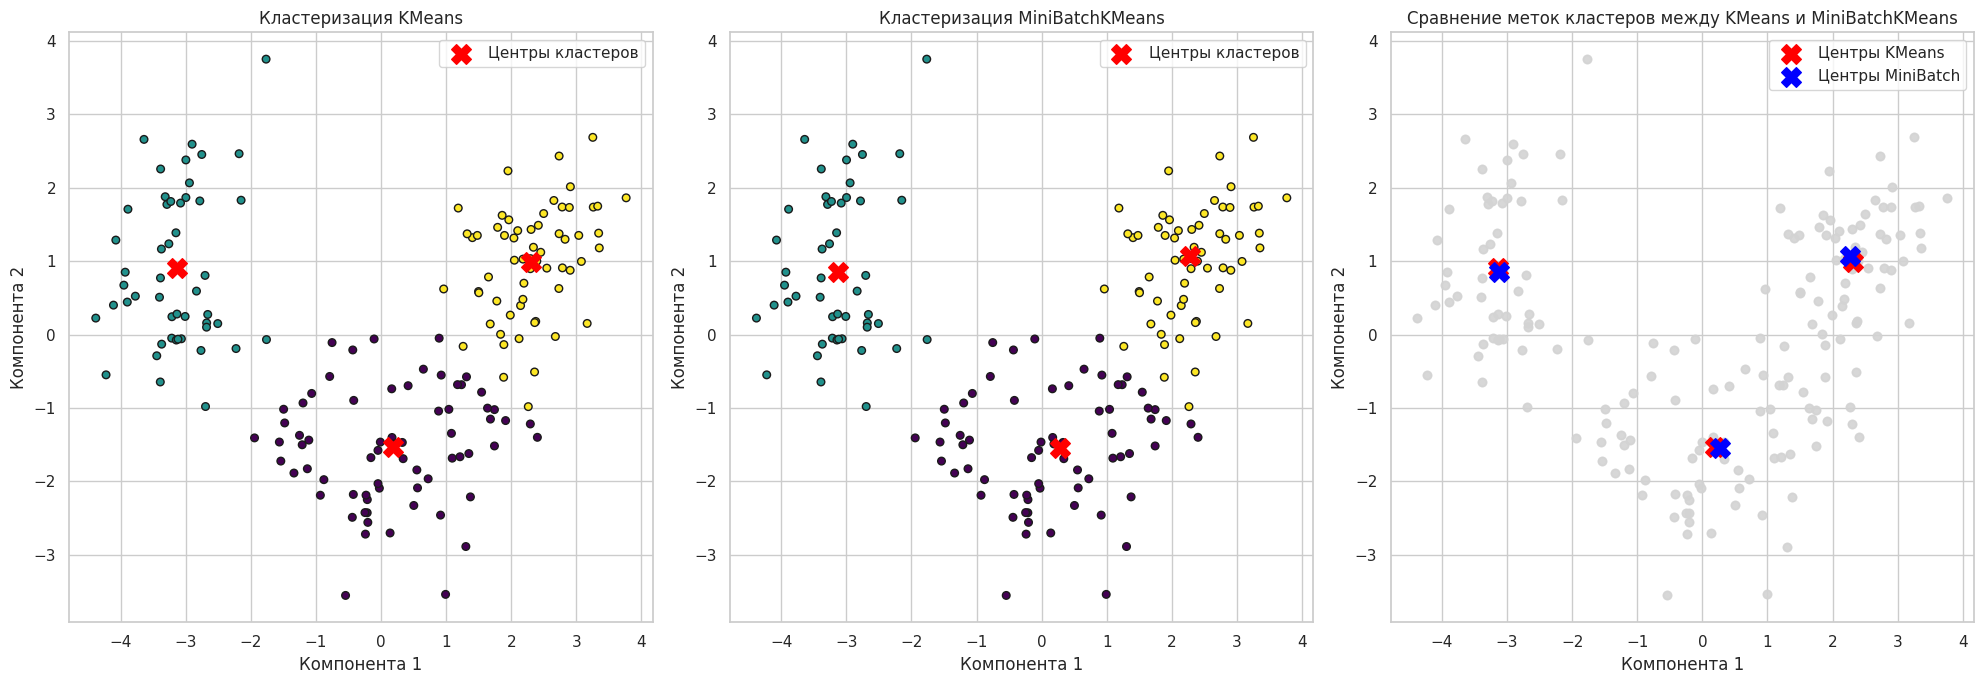

In [40]:
from sklearn.cluster import MiniBatchKMeans

# Настройка параметров для KMeans и MiniBatchKMeans
n_clusters = 3  # Количество кластеров

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(new_data)  # Получаем метки кластеров

# Кластеризация с использованием MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, random_state=42)
minibatch_labels = minibatch_kmeans.fit_predict(new_data)  # Получаем метки кластеров

# Создаем график для сравнения меток кластеров
plt.figure(figsize=(20, 7))

# Отображаем точки данных для KMeans
plt.subplot(1, 3, 1)  # Подграфик 1 (KMeans)
plt.scatter(new_data[:, 0], new_data[:, 1], c=kmeans_labels, cmap='viridis', s=30, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Центры кластеров')
plt.title('Кластеризация KMeans')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()

# Отображаем точки данных для MiniBatchKMeans
plt.subplot(1, 3, 2)  # Подграфик 2 (MiniBatchKMeans)
plt.scatter(new_data[:, 0], new_data[:, 1], c=minibatch_labels, cmap='viridis', s=30, edgecolor='k')
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Центры кластеров')
plt.title('Кластеризация MiniBatchKMeans')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()

# Сравнение меток кластеров между KMeans и MiniBatchKMeans
plt.subplot(1, 3, 3)  # Подграфик 3 (Сравнение)
for i in range(n_clusters):
    # Получаем индексы точек из KMeans и MiniBatchKMeans для текущего кластера
    kmeans_points = new_data[kmeans_labels == i]
    minibatch_points = new_data[minibatch_labels == i]

    # Отображаем точки из KMeans с тусклым цветом
    plt.scatter(kmeans_points[:, 0], kmeans_points[:, 1], color='lightgray', alpha=0.5)

    # Отображаем точки из MiniBatchKMeans с другим маркером
    plt.scatter(minibatch_points[:, 0], minibatch_points[:, 1], color='lightgray', alpha=0.5)

# Определяем цвет для совпадающих и несовпадающих точек
for idx in range(len(new_data)):
    if kmeans_labels[idx] == minibatch_labels[idx]:
        plt.scatter(new_data[idx][0], new_data[idx][1], color='lightgray', alpha=0.5) # Совпадающие точки
    else:
        plt.scatter(new_data[idx][0], new_data[idx][1], color='red', alpha=0.5) # Несовпадающие точки

# Отображаем центры кластеров на графике сравнения
centroids_kmeans = kmeans.cluster_centers_
centroids_minibatch = minibatch_kmeans.cluster_centers_
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], marker='X', s=200, c='red', label='Центры KMeans')
plt.scatter(centroids_minibatch[:, 0], centroids_minibatch[:, 1], marker='X', s=200, c='blue', label='Центры MiniBatch')

# Настраиваем заголовок и легенду
plt.title('Сравнение меток кластеров между KMeans и MiniBatchKMeans')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True)

# Показываем графики
plt.tight_layout()
plt.show()

Дать пояснения:
1. В чем отличие результата пакетной кластеризации k-средних от обычного метода k-средних?
2. Чем отличаются построенное графическое представление?

1. Пакетная кластеризация k-средних отличается от обычного метода k-средних тем, что она обрабатывает данные не целиком, а использует небольшие случайные подвыборки (пакеты) данных на каждой итерации. Это позволяет значительно сократить время вычислений и снизить потребление памяти, особенно при работе с большими наборами данных. В результате пакетная кластеризация может быть более быстрой, но иногда менее точной, чем классический метод k-средних, поскольку обновление центров кластеров происходит на основе меньшего объема данных

2. На третьем графике представлено сравнение меток кластеров между Kmeans и MiniBatchKmeans. Бледно-серым цветом отмечены совпадающие метки, красным - несовпадающие. По графику видно, что все метки совпадают и графические представления методов в нашем случае не отличается. Разве что чуть смещены центроиды. Скорее всего, это связано с малым количеством кластеров

**3. Иерархическая кластеризация**

3.1 Провести и отобразить иерархическую кластеризацию на тех же данных (см. п.1.4. и п.2.2) с параметром average. Использовать: AgglomerativeClustering из sklearn.cluster

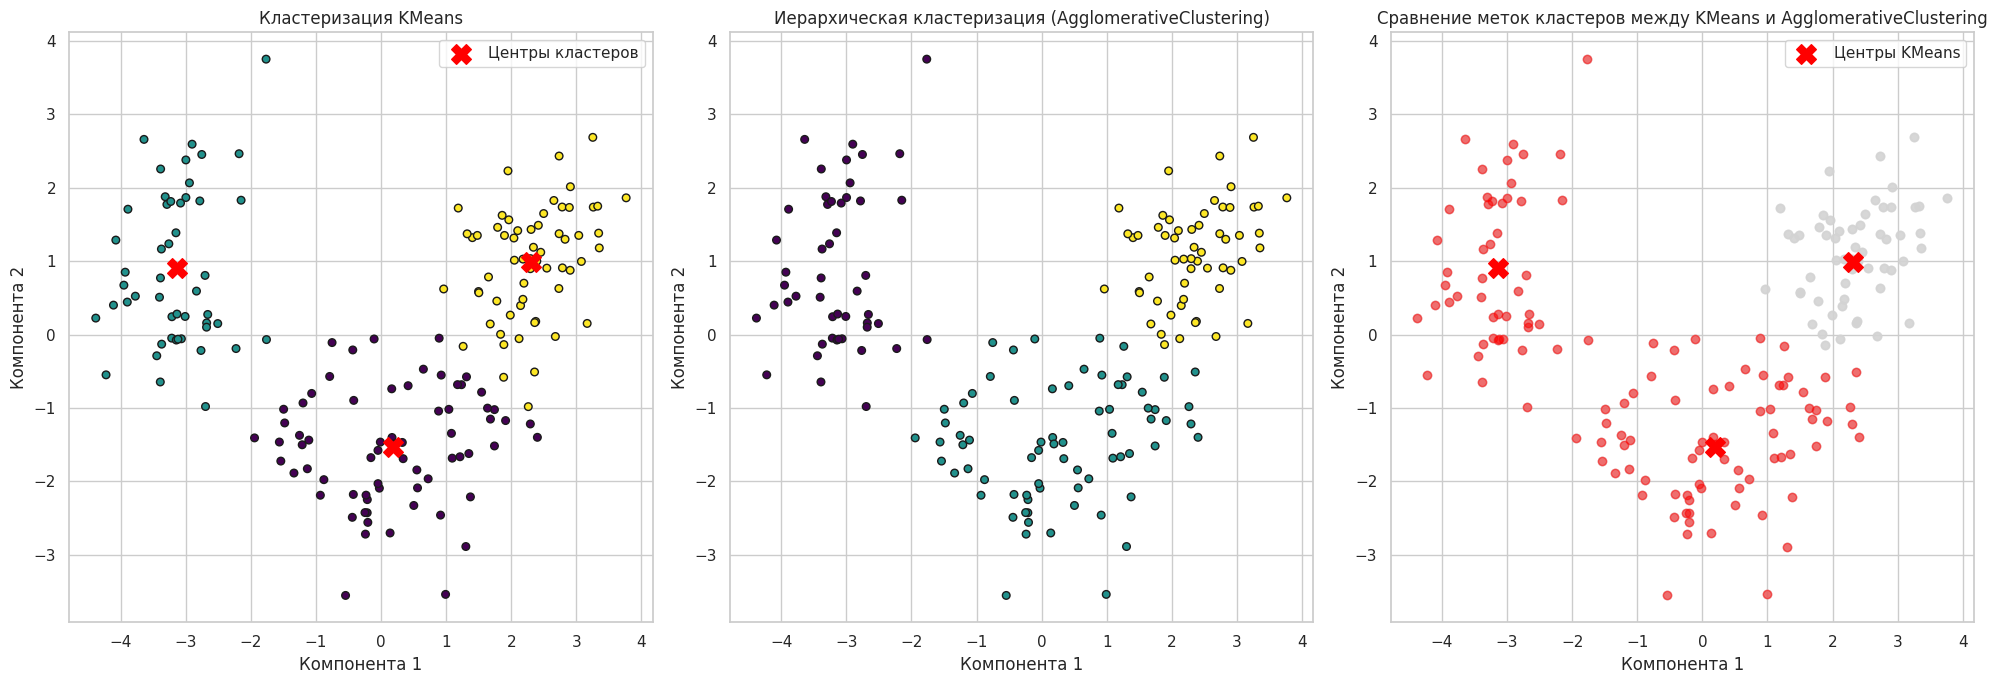

In [51]:
from sklearn.cluster import AgglomerativeClustering

# Настройка параметров для KMeans
n_clusters = 3  # Количество кластеров

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(new_data)  # Получаем метки кластеров

# Кластеризация с использованием AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
agglo_labels = agglo.fit_predict(new_data)  # Получаем метки кластеров

# Создаем график для сравнения меток кластеров
plt.figure(figsize=(20, 7))

# Отображаем точки данных для KMeans
plt.subplot(1, 3, 1)  # Подграфик 1 (KMeans)
plt.scatter(new_data[:, 0], new_data[:, 1], c=kmeans_labels, cmap='viridis', s=30, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Центры кластеров')
plt.title('Кластеризация KMeans')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()

# Отображаем точки данных для AgglomerativeClustering
plt.subplot(1, 3, 2)  # Подграфик 2 (AgglomerativeClustering)
plt.scatter(new_data[:, 0], new_data[:, 1], c=agglo_labels, cmap='viridis', s=30, edgecolor='k')
plt.title('Иерархическая кластеризация (AgglomerativeClustering)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')

# Сравнение меток кластеров между KMeans и AgglomerativeClustering
plt.subplot(1, 3, 3)  # Подграфик 3 (Сравнение)
for i in range(n_clusters):
    # Получаем индексы точек из KMeans и AgglomerativeClustering для текущего кластера
    kmeans_points = new_data[kmeans_labels == i]
    agglo_points = new_data[agglo_labels == i]

    # Отображаем точки из KMeans с тусклым цветом
    plt.scatter(kmeans_points[:, 0], kmeans_points[:, 1], color='lightgray', alpha=0.5)

    # Отображаем точки из AgglomerativeClustering с другим маркером
    plt.scatter(agglo_points[:, 0], agglo_points[:, 1], color='lightgray', alpha=0.5)

# Определяем цвет для совпадающих и несовпадающих точек
for idx in range(len(new_data)):
    if kmeans_labels[idx] == agglo_labels[idx]:
        plt.scatter(new_data[idx][0], new_data[idx][1], color='lightgray', alpha=0.5) # Совпадающие точки
    else:
        plt.scatter(new_data[idx][0], new_data[idx][1], color='red', alpha=0.5) # Несовпадающие точки

# Отображаем центры кластеров на графике сравнения
centroids_kmeans = kmeans.cluster_centers_
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], marker='X', s=200, c='red', label='Центры KMeans')

# Настраиваем заголовок и легенду
plt.title('Сравнение меток кластеров между KMeans и AgglomerativeClustering')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True)

# Показываем графики
plt.tight_layout()
plt.show()

Дать пояснения:
1. Чем отличаются результаты (графическое изображение), полученные
по методу KMeans и AgglomerativeClustering?
2. Какой из методов дал более точные результаты для заданных
исходных данных и почему?

1. Первый график показывает результаты кластеризации методом KMeans. Он разбивает данные на три кластера, определяя центры кластеров (обозначенные красными крестиками). Второй график показывает результаты кластеризации методом AgglomerativeClustering с параметром average. На третьем графике видно, что некоторые точки, относящиеся к одному кластеру в KMeans, отнесены к другому кластеру в AgglomerativeClustering (отмеченные красным цветом). Также можно заметить, что зеленый и фиолетовый кластеры "поменялись местами", из-за чего на третьем графике метки двух кластеров полностью красные. По сути, смена меток кластеров в AgglomerativeClustering по сравнению с KMeans объясняется различной логикой формирования кластеров:
* KMeans начинает с инициализации центров кластеров, и затем точки распределяются вокруг этих центров
* AgglomerativeClustering работает по иному принципу: он последовательно объединяет ближайшие точки или группы точек. Порядок, в котором точки объединяются в кластеры, не зависит от начального положения центров, поэтому может привести к иному распределению точек по кластерам, как и произошло с зелеными и фиолетовыми кластерами.

2. Если считать более точным методом тот, который разделяет кластеры на более четкие группы и минимизирует расстояние до центров кластеров, то KMeans выглядит предпочтительным. Его кластеры более компактны и легко идентифицируемы на графике. На этом графике агломеративный метод приводит к некоторым пересечениям и смешению точек между кластерами, что может указывать на менее четкую сегментацию.

3.2 Проведите исследование для различного размера кластеров (от 2 до 5). Приведите полученные результаты. Использовать параметр n_clusters из AgglomerativeClustering

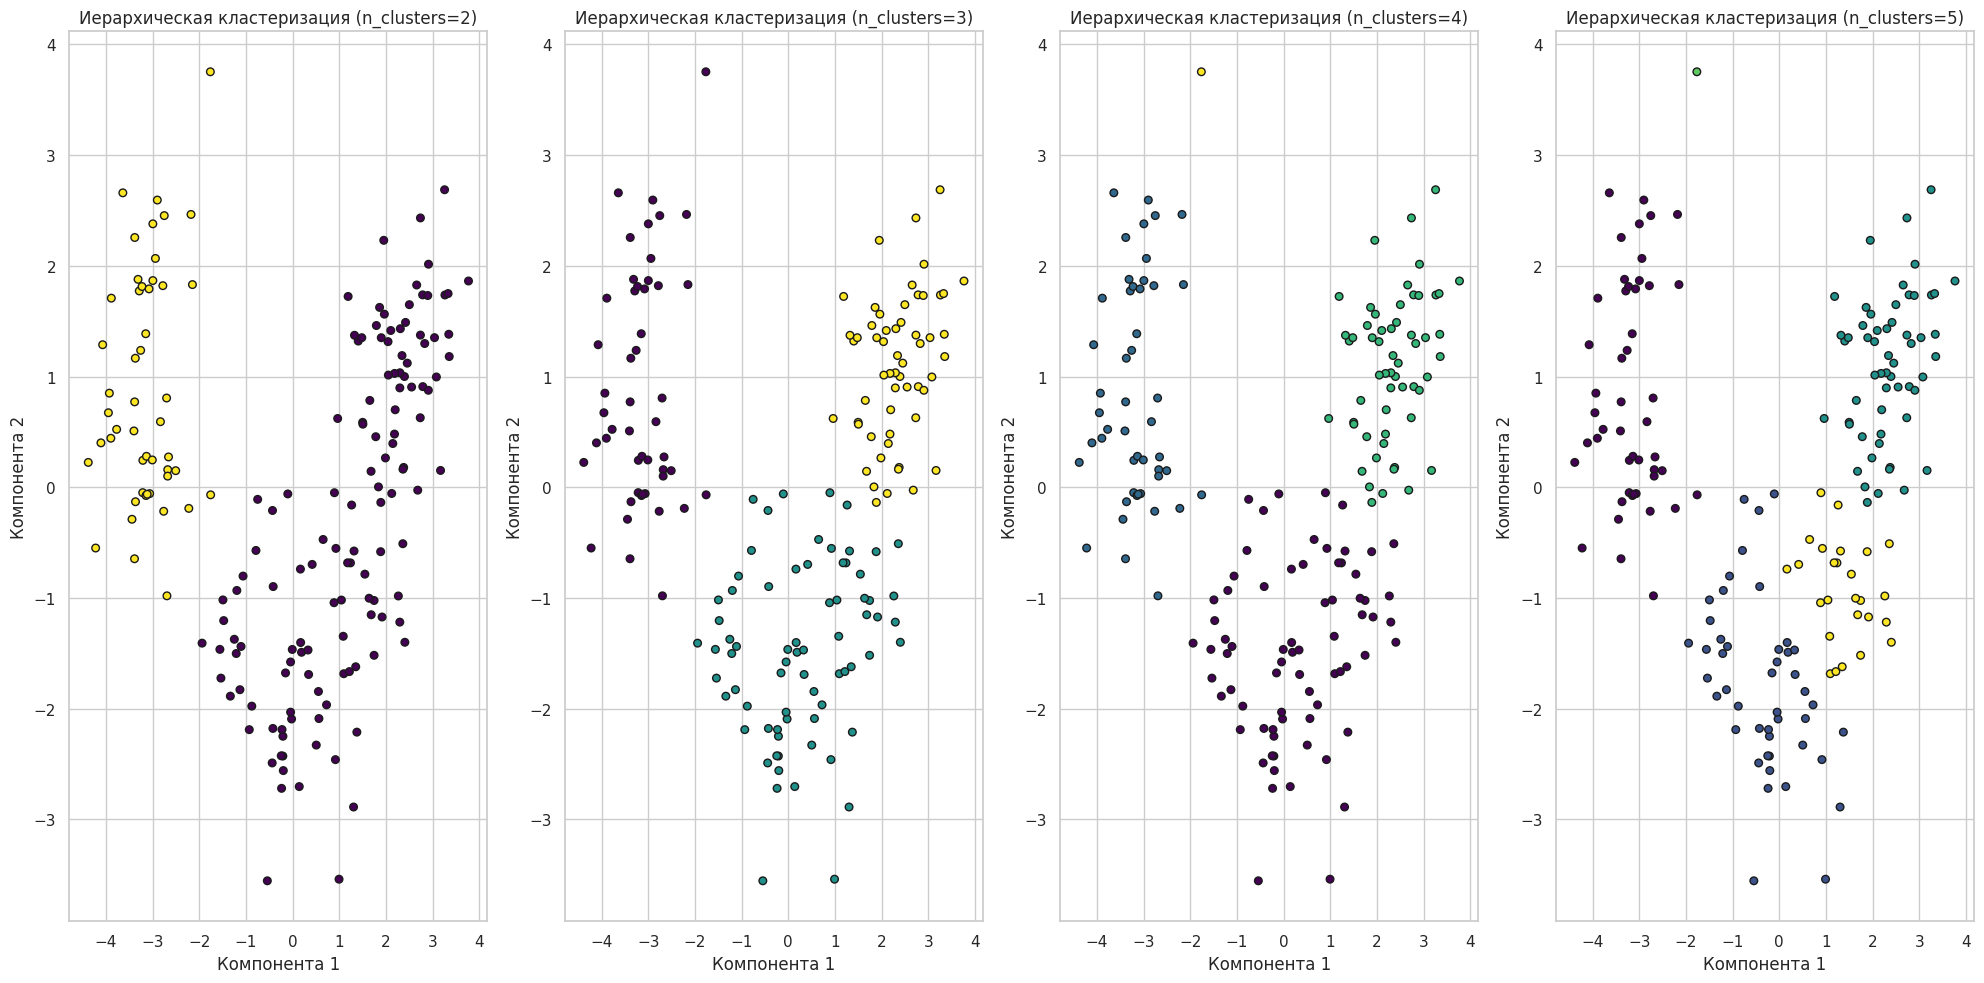

In [52]:
# Определяем диапазон для количества кластеров
n_clusters_range = range(2, 6)  # Проверяем количество кластеров от 2 до 5

# Создаем фигуру для отображения результатов
plt.figure(figsize=(20, 10))

# Перебираем количество кластеров в заданном диапазоне
for i, n_clusters in enumerate(n_clusters_range):
    # Кластеризация с использованием Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    agglo_labels = agglo.fit_predict(new_data)  # Получаем метки кластеров

    # Отображаем точки данных для текущего значения n_clusters
    plt.subplot(1, len(n_clusters_range), i + 1)  # Создаем подграфик
    plt.scatter(new_data[:, 0], new_data[:, 1], c=agglo_labels, cmap='viridis', s=30, edgecolor='k')

    # Настраиваем заголовок и оси графика
    plt.title(f'Иерархическая кластеризация (n_clusters={n_clusters})')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')

# Показываем графики
plt.tight_layout()
plt.show()

Дать пояснения:
1. Какой из значений параметра n_clusters дал наилучшие результаты
и почему?

1. Если считать более точным методом тот, который разделяет кластеры на более четкие группы, то лучший результат n_clusters=4. n_clusters=3 тоже показал хороший результат, но самый верхний маркер расположен достаточно далеко даже от ближайших синих маркеров. Таким образом, отделение данного маркера в отдельный кластер будет более лучшим результатом. На первом графике (n_clusters=2) можно заметить, что метки фиолетового кластера очень растянуты. В случае n_clusters=5 нет четкого разделения на кластеры

3.3 Постройте дендограмму до уровня 6

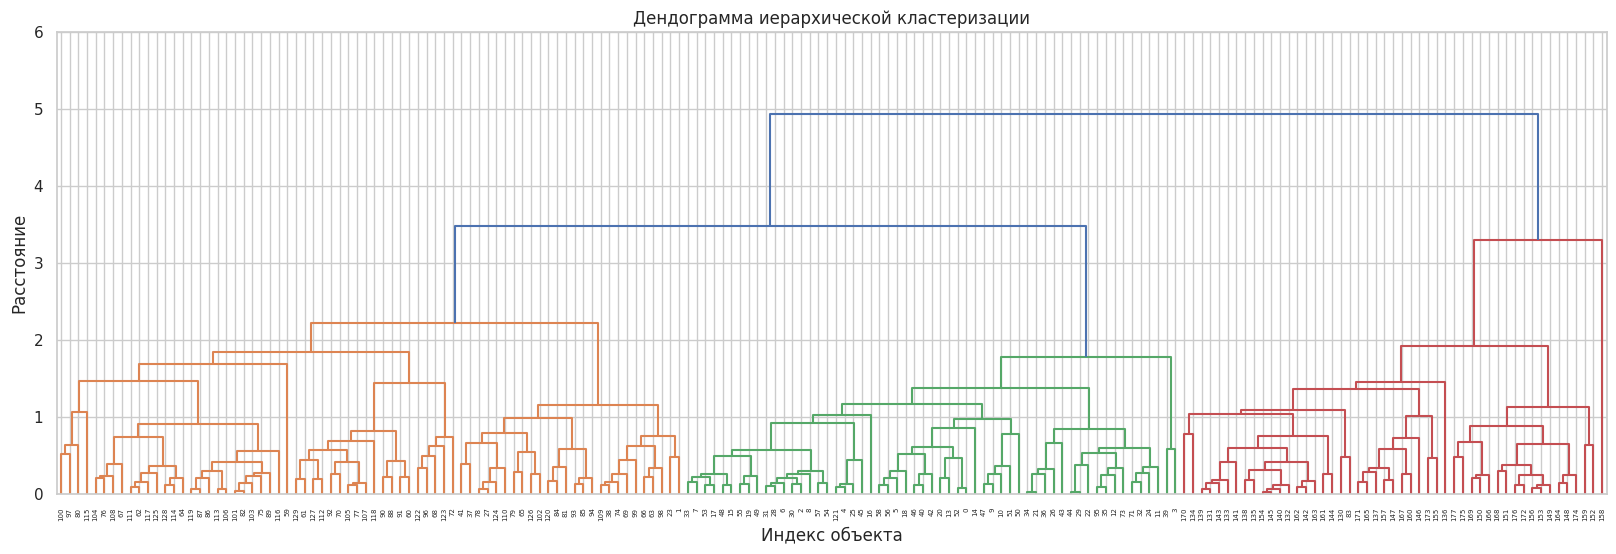

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Выполняем агломеративную кластеризацию для построения дендограммы
# Используем метод 'average' для вычисления расстояний между кластерами
linked = linkage(new_data, method='average')

# Создаем график для дендограммы
plt.figure(figsize=(20, 6))
dendrogram(linked,
           orientation='top',  # Ориентация дендограммы
           distance_sort='descending',  # Сортировка по убыванию расстояний
           show_leaf_counts=True)  # Показывать количество объектов в каждом кластере

# Настраиваем заголовок и оси графика
plt.title('Дендограмма иерархической кластеризации')
plt.xlabel('Индекс объекта')
plt.ylabel('Расстояние')

# Устанавливаем лимит по оси Y до уровня 6
plt.ylim(0, 6)

# Показываем график
plt.show()

3.4 Сгенерируйте случайные данные (x,y) в виде двух квадратных контуров

Замечание:
* Общее количество точек 750: внешний квадратный контур - 500; внутренний квадратный контур - 250.
* Проведите их иерархическую кластеризацию со всеми возможными параметрами linkage.
* Отобразите полученные результаты

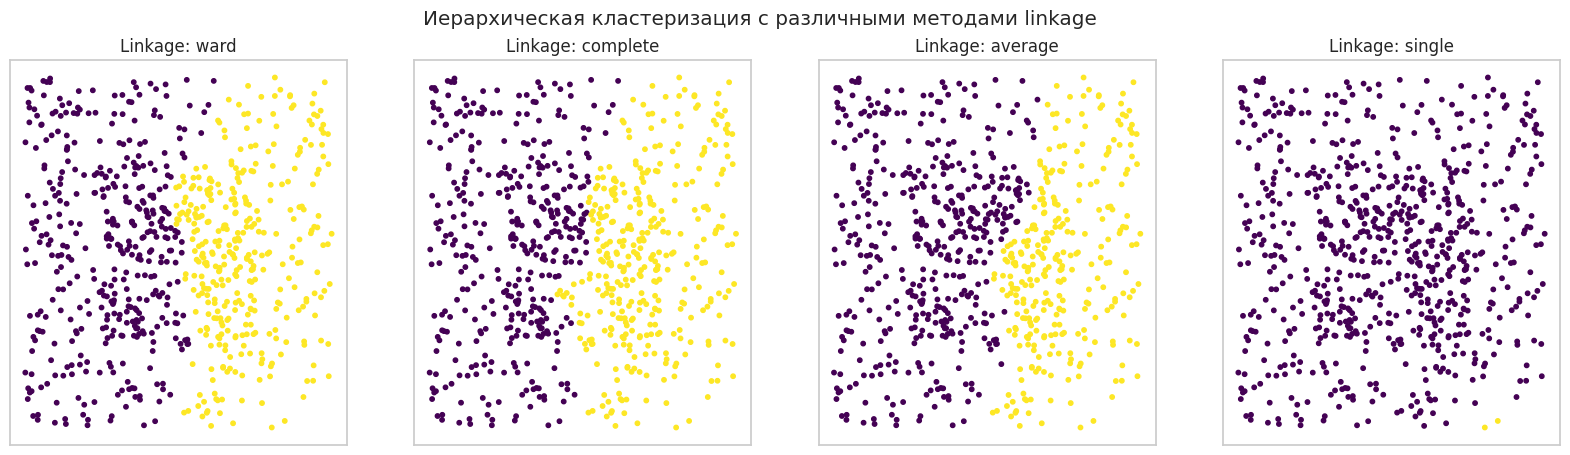

In [67]:
# Устанавливаем семя генератора случайных чисел для воспроизводимости
np.random.seed(42)

# Генерация данных для внешнего квадратного контура (500 точек)
outer_square = np.vstack([
    np.random.uniform(-10, 10, size=(125, 2)),  # Левая сторона
    np.random.uniform(-10, 10, size=(125, 2)),  # Правая сторона
    np.random.uniform(-10, 10, size=(125, 2)),  # Верхняя сторона
    np.random.uniform(-10, 10, size=(125, 2))   # Нижняя сторона
])

# Генерация данных для внутреннего квадратного контура (250 точек)
inner_square = np.vstack([
    np.random.uniform(-5, 5, size=(63, 2)),   # Левая сторона
    np.random.uniform(-5, 5, size=(62, 2)),   # Правая сторона
    np.random.uniform(-5, 5, size=(62, 2)),   # Верхняя сторона
    np.random.uniform(-5, 5, size=(63, 2))    # Нижняя сторона
])

# Объединяем данные в один массив
X = np.vstack([outer_square, inner_square])

# Определяем методы связи для иерархической кластеризации
linkage_methods = ['ward', 'complete', 'average', 'single']

# Создаем графики для отображения результатов кластеризации
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Иерархическая кластеризация с различными методами linkage")

# Перебираем методы связи и выполняем кластеризацию
for i, method in enumerate(linkage_methods):
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method)  # Кластеризация с заданным методом связи
    labels = clustering.fit_predict(X)  # Получаем метки кластеров

    # Отображаем результаты кластеризации
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    axes[i].set_title(f"Linkage: {method}")
    axes[i].set_xticks([])  # Убираем метки по оси X
    axes[i].set_yticks([])  # Убираем метки по оси Y

# Показываем графики
plt.show()

Дать пояснения:
1. Какой тип связи работает лучше всего и почему?

1. Linkage: ward
Метод ward минимизирует сумму квадратов отклонений внутри кластеров, что делает его пригодным для создания плотных и компактных кластеров. В нашем случае данный метод показал четкое разделение на два кластера. Визуально точки на графике распределены таким образом, что оба кластера разделены по центру данных, но граница между внутренним и внешним квадратами не является четкой.


2. Linkage: complete
Данный метод использует максимальное расстояние между точками кластеров, что может способствовать образованию более четких границ между кластерами, но в нашем случае он тоже оказался неэффективен для выделения двух контуров. Большинство точек распределено равномерно по кластерам, но граница между внутренним и внешним квадратами все также размыта.

3. Linkage: average
Метод average показал очень схожий результат с ward и complete. Кластеры здесь также не выделяют четко внешний и внутренний квадраты. Поскольку average linkage использует среднее расстояние между точками кластеров, результат получается компромиссным, и кластеры образуют более размытые границы.

4. Linkage: single
Метод single дал самый слабый результат: практически все точки объединены в один кластер, за исключением нескольких точек, которые были выделены отдельно.Single linkage основан на минимальном расстоянии между точками кластеров, и это делает его склонным к образованию вытянутых, цепочечных кластеров. В данном случае он не сумел правильно выделить кластеры для обоих контуров, так как данные распределились в одном основном кластере

Наиболее подходящим в данной ситуации можно считать метод ward, так как он создал более плотные и равномерно распределенные кластеры, более-менее соответствующие структуре данных.